<a href="https://colab.research.google.com/github/noushadkhan01/Projects/blob/master/Hackathons/Analytics%20Vidhya/Loan%20Approval%20Prediction/Predict_Loan_Approval_Analytics_Vidhya_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [59]:
!git clone https://github.com/noushadkhan01/my_methods
%cd my_methods
from print_model_results import print_model_results
from get_cross_validation import get_cross_validation
from my_dummy_variable_creator import MyDummyVariable
import my_global_variables
#initialize my_global_variable
my_global_variables.init()
from choose_best_classifier import choose_best_classifier
%cd ../

fatal: destination path 'my_methods' already exists and is not an empty directory.
/content/my_methods
/content


In [60]:
train = pd.read_csv('https://bit.ly/310J7ZX')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [61]:
test = pd.read_csv('https://bit.ly/2LJwq1U')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [0]:
test_id = test[['Loan_ID']]

In [63]:
train.shape, test.shape

((614, 13), (367, 12))

###ratio of class in training dataset

In [64]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

#Data Preprocessing

##check null values

In [65]:
print('train\n', train.isnull().sum().sort_values(ascending = False)[:9])
print('\n\n test\n', test.isnull().sum().sort_values(ascending = False)[:9])

train
 Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
Loan_Status          0
Property_Area        0
dtype: int64


 test
 Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
dtype: int64


In [66]:
train_null_columns = train.isnull().any(axis = 0)
train_null_columns = train_null_columns[train_null_columns == True].keys()
train_null_columns

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [67]:
test_null_columns = test.isnull().any(axis = 0)
test_null_columns = test_null_columns[test_null_columns == True].keys()
test_null_columns

Index(['Gender', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

##Drop irrelevant features

In [0]:
train.drop(['Loan_ID'], inplace = True, axis = 1)
test.drop(['Loan_ID'], inplace = True, axis = 1)

In [69]:
#make test and train columns in same order if they are in different order
test = test[train.columns.values[:-1]]
test.shape

(367, 11)

In [70]:
test.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [71]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [72]:
train_null_columns

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

##Fill Null Values

###Check which null column directly related to any other column

##Visualisation

In [73]:
cat_columns = train.select_dtypes(include = 'object').columns
cat_columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [74]:
cat_columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [0]:
def plot_text(text, figsize = (20, 1.5)):
  plt.figure(figsize = figsize)
  plt.text(.5, 0.5, s = text, size= 40,
           ha="center", va="center",
           bbox=dict(boxstyle="round",
                     facecolor = 'blue',
                     ec=(1., 0.5, 0.5),
                     fc=(1., 0.8, 0.8),
                     ))
  sns.despine(left = True, bottom = True)
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [76]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

for i in cat_columns:
  plot_text(i)
  n = 1
  l = cat_columns.tolist()
  column = i
  l.remove(column)
  plt.figure(figsize = (20, 15))
  for i in l:
    plt.subplot(3, 3, n)
    sns.countplot(x = i, hue = column, data = train.dropna())
    n += 1
  plt.show()


In [77]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

##fill categorical column's null values with mode

In [78]:
cat_null_columns = train[cat_columns].isnull().any()
cat_null_columns = cat_null_columns[cat_null_columns == True].keys()
cat_null_columns

Index(['Gender', 'Married', 'Dependents', 'Self_Employed'], dtype='object')

In [0]:
#Credit_History is also a categorical column but it's is in numeric form
for i in cat_null_columns.tolist() + ['Credit_History']:
  mode = train[i].mode()[0]
  train[i].fillna(mode, inplace = True)
  test[i].fillna(mode, inplace = True)

In [80]:
train.isnull().sum().sort_values(ascending = False)[:4]

LoanAmount          22
Loan_Amount_Term    14
Loan_Status          0
Property_Area        0
dtype: int64

In [81]:
test.isnull().sum().sort_values(ascending = False)[:3]

Loan_Amount_Term    6
LoanAmount          5
Property_Area       0
dtype: int64

In [82]:
num_columns = train.select_dtypes(exclude = 'object')
num_null_columns = num_columns.isnull().any()
num_null_columns = num_null_columns[num_null_columns == True].keys()
num_null_columns

Index(['LoanAmount', 'Loan_Amount_Term'], dtype='object')

###fill numeric columns with median

In [0]:
for i in num_null_columns:
  median = train[i].median()
  train[i].fillna(median, inplace = True)
  test[i].fillna(median, inplace = True)

In [84]:
train.isnull().sum().sort_values(ascending = False)[:2]

Loan_Status      0
Property_Area    0
dtype: int64

In [85]:
test.isnull().sum().sort_values(ascending = False)[:2]

Property_Area     0
Credit_History    0
dtype: int64

##One Hot Encode

In [86]:
train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [87]:
y = train.Loan_Status
X = train.drop('Loan_Status', axis = 1)
X.shape, y.shape

((614, 11), (614,))

In [88]:
ohe = MyDummyVariable()
X = ohe.fit_transform(X)
X.shape

(614, 14)

In [89]:
X.head(2)

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5849.0,0.0,128.0,360.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0


In [90]:
test.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban


In [91]:
test = ohe.transform(test)
test.shape

(367, 14)

##Scaling

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [104]:
y[:5]

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [0]:
y.replace(['N', 'Y'], [0, 1], inplace = True)

#Make Model

##Check best classifier

In [0]:
from imblearn.over_sampling import SMOTE, ADASYN

In [0]:
sm = SMOTE(k_neighbors = 5, random_state = 0)
ad = ADASYN(n_neighbors = 5, random_state = 0)

In [0]:
import warnings
warnings.filterwarnings(action = 'ignore')

PCA with LR: 0.687335 (0.029224)
LR: 0.807985 (0.038146)
LDA: 0.807985 (0.038146)
KNN: 0.617292 (0.045222)
DTree: 0.731438 (0.054225)
RandomForest: 0.785061 (0.038688)
NB: 0.790058 (0.038596)
SVM: 0.688974 (0.032301)
Xgboost: 0.765574 (0.042809)
 Done

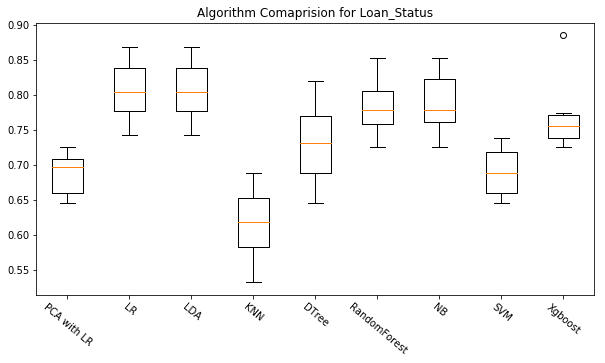

In [0]:
plt.figure(figsize = (10, 5))
choose_best_classifier(X, y)

##SMOTE

PCA with LR: 0.263936 (0.137470)
LR: 0.745210 (0.073988)
LDA: 0.740448 (0.088251)
KNN: 0.612493 (0.056079)
DTree: 0.777591 (0.083909)
RandomForest: 0.832017 (0.073082)
NB: 0.739132 (0.092335)
SVM: 0.264006 (0.119129)
Xgboost: 0.832059 (0.082710)
 Done

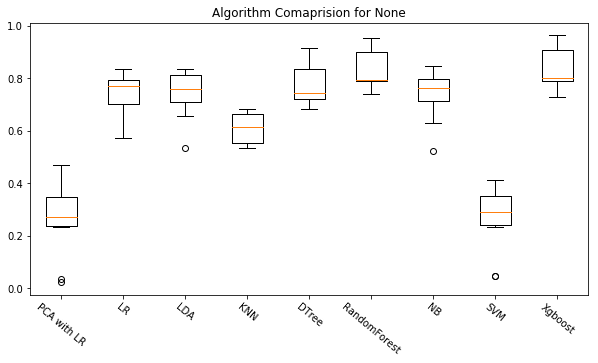

In [0]:
sm = SMOTE(k_neighbors = 5, random_state = 0 )
X_sm, y_sm = sm.fit_resample(X, y)
plt.figure(figsize = (10, 5))
choose_best_classifier(X_sm, y_sm)

##ADASYN

PCA with LR: 0.255106 (0.135000)
LR: 0.736876 (0.078757)
LDA: 0.737980 (0.090573)
KNN: 0.574627 (0.035229)
DTree: 0.787722 (0.077368)
RandomForest: 0.840261 (0.073358)
NB: 0.733032 (0.113512)
SVM: 0.283821 (0.150313)
Xgboost: 0.833133 (0.079785)
 Done

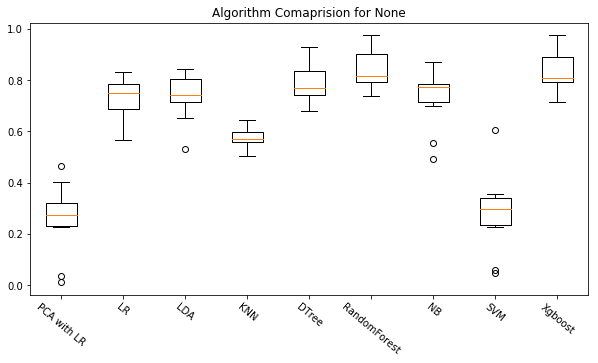

In [0]:
ad = ADASYN(n_neighbors = 5, random_state = 0)
X_ad, y_ad = ad.fit_resample(X, y)
plt.figure(figsize = (10, 5))
choose_best_classifier(X_ad, y_ad)

There is a lot of class imbalanced in our dataset so we need to apply oversampling in our data so for SMOTE and ADASYN data RandomForest and XGBoost performs well

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
from xgboost import XGBClassifier

##Model for SMOTE

In [0]:
from sklearn.metrics import f1_score

In [0]:
from sklearn.metrics import recall_score

In [0]:
from sklearn.model_selection import train_test_split
f1_scores = []
recall_scores = []
for i in range(1, 30):
  sm = SMOTE(k_neighbors = i, random_state = 0)
  X_sm, y_sm = sm.fit_resample(X_sc, y)
  X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = .2, random_state = 0)
  X_train.shape, X_test.shape, y_train.shape, y_test.shape
  model = RandomForestClassifier(random_state = 0)
  from sklearn.metrics import f1_score, recall_score
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  f1_score = f1_score(y_test, y_pred)
  f1_scores.append(f1_score)
  recall_score = recall_score(y_test, y_pred)
  recall_scores.append(recall_score)

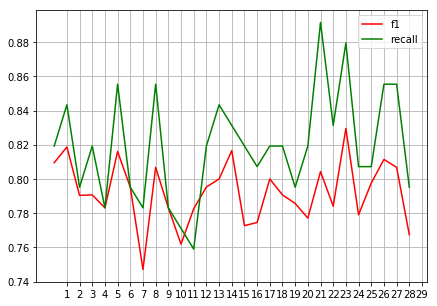

In [0]:
plt.figure(figsize = (7, 5))
plt.plot(f1_scores, c = 'r', label = 'f1')
plt.plot(recall_scores, c = 'g', label = 'recall')
plt.xticks(range(1, 30))
plt.grid()
plt.legend()
plt.show()

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
sm = SMOTE(k_neighbors = 22, random_state = 0)
X_sm , y_sm = sm.fit_resample(X_sc, y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 0)

In [0]:
model = RandomForestClassifier(random_state = 0)
print_model_results(X_train, X_test, y_train, y_test, model, extra_name = 'smote_25')

 Train score is 0.9866666666666667


Test score is 0.7869822485207101



Train confusion matrix is 
 [[332   4]
 [  5 334]]

Test confusion matrix is 
 [[59 27]
 [ 9 74]]



Test Set classification report is 
               precision    recall  f1-score   support

           0       0.87      0.69      0.77        86
           1       0.73      0.89      0.80        83

    accuracy                           0.79       169
   macro avg       0.80      0.79      0.79       169
weighted avg       0.80      0.79      0.78       169



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
model = RandomForestClassifier(random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.8043478260869565

In [0]:
from sklearn.metrics import re

In [0]:
train_scores = []
test_scores = []
for i in range(10, 30):
  model = RandomForestClassifier(min_samples_split = i, random_state = 0)
  model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  test_score = model.score(X_test, y_test)
  train_scores.append(train_score)
  test_scores.append(test_score)

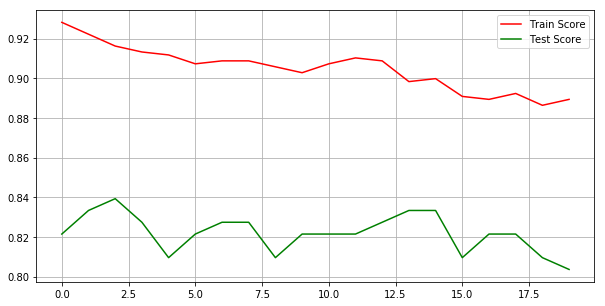

In [0]:
plt.figure(figsize = (10, 5))
plt.plot(train_scores, c = 'r', label = 'Train Score')
plt.plot(test_scores, c = 'g', label = 'Test Score')
plt.legend()
plt.grid()
plt.show()

In [0]:
train_scores = []
test_scores = []
for i in range(10, 70):
  model = RandomForestClassifier(max_depth = i, random_state = 0)
  model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  test_score = model.score(X_test, y_test)
  train_scores.append(train_score)
  test_scores.append(test_score)

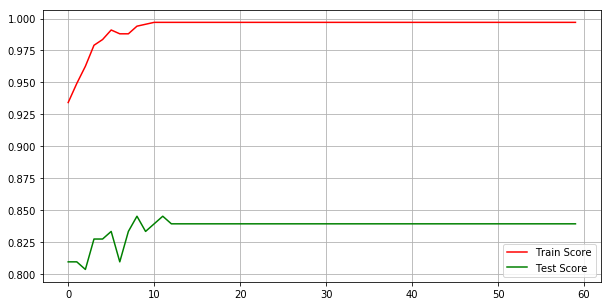

In [0]:
plt.figure(figsize = (10, 5))
plt.plot(train_scores, c = 'r', label = 'Train Score')
plt.plot(test_scores, c = 'g', label = 'Test Score')
plt.legend()
plt.grid()
plt.show()

In [0]:
param_grid = {'min_samples_split': range(10, 50), 'max_depth': range(5, 30), 'random_state':[0]}

In [0]:
model = RandomForestClassifier()

In [0]:
grid = GridSearchCV(estimator = model, param_grid = param_grid,cv = 2, scoring = 'accuracy', n_jobs = -1, verbose = 5, return_train_score = True)
grid.fit(X_sm, y_sm)

Fitting 2 folds for each of 1000 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 900 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   25.1s finished


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
grid.best_params_

{'max_depth': 5, 'min_samples_split': 36, 'random_state': 0}

In [0]:
model = RandomForestClassifier(max_depth = 7, min_samples_split = 36, random_state = 0)
print_model_results(X_train, X_test, y_train, y_test, model, extra_name = 'tuned_smote')

 Train score is 0.8729446935724963


Test score is 0.8035714285714286



Train confusion matrix is 
 [[262  77]
 [  8 322]]

Test confusion matrix is 
 [[47 29]
 [ 4 88]]



Test Set classification report is 
               precision    recall  f1-score   support

           N       0.92      0.62      0.74        76
           Y       0.75      0.96      0.84        92

    accuracy                           0.80       168
   macro avg       0.84      0.79      0.79       168
weighted avg       0.83      0.80      0.80       168



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=36,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
model = XGBClassifier()
print_model_results(X_train, X_test, y_train, y_test, model, extra_name = 'smote')

 Train score is 0.8874074074074074


Test score is 0.8165680473372781



Train confusion matrix is 
 [[266  70]
 [  6 333]]

Test confusion matrix is 
 [[57 29]
 [ 2 81]]



Test Set classification report is 
               precision    recall  f1-score   support

           N       0.97      0.66      0.79        86
           Y       0.74      0.98      0.84        83

    accuracy                           0.82       169
   macro avg       0.85      0.82      0.81       169
weighted avg       0.85      0.82      0.81       169



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

###ADASYN

In [0]:
model = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_ad, y_ad, random_state = 0, test_size = .2)
print_model_results(X_train, X_test, y_train, y_test, model, extra_name= 'ADASYN')

 Train score is 0.9940209267563528


Test score is 0.7797619047619048



Train confusion matrix is 
 [[336   3]
 [  1 329]]

Test confusion matrix is 
 [[52 24]
 [13 79]]



Test Set classification report is 
               precision    recall  f1-score   support

           N       0.80      0.68      0.74        76
           Y       0.77      0.86      0.81        92

    accuracy                           0.78       168
   macro avg       0.78      0.77      0.77       168
weighted avg       0.78      0.78      0.78       168



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
model = XGBClassifier()
print_model_results(X_train, X_test, y_train, y_test, model, extra_name= 'adasyn')

 Train score is 0.8849028400597907


Test score is 0.8035714285714286



Train confusion matrix is 
 [[265  74]
 [  3 327]]

Test confusion matrix is 
 [[47 29]
 [ 4 88]]



Test Set classification report is 
               precision    recall  f1-score   support

           N       0.92      0.62      0.74        76
           Y       0.75      0.96      0.84        92

    accuracy                           0.80       168
   macro avg       0.84      0.79      0.79       168
weighted avg       0.83      0.80      0.80       168



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
model = my_global_variables.my_models
model

{'LogisticRegression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'LogisticRegression_ADASYN': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'LogisticRegression_SMOTE': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solve

In [0]:
model_lr = model['LogisticRegression']
model_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#ANN

In [4]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [5]:
import tensorflow as tf
tf.__version__

'2.0.0-beta1'

In [99]:
X.head(2)

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5849.0,0.0,128.0,360.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0


In [95]:
X_sc.shape, y.shape

((614, 14), (614,))

In [0]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((491, 14), (123, 14), (491,), (123,))

In [0]:
def create_model():
  model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 100, activation = tf.nn.relu, input_dim = X.shape[1]),
                             tf.keras.layers.Dropout(rate = 0.4, seed = 0),
                             tf.keras.layers.Dense(units = 100, activation = tf.nn.relu),
                             tf.keras.layers.Dropout(rate = 0.4, seed = 0),
                             tf.keras.layers.Dense(units = 1, activation = tf.nn.sigmoid)
  ])
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [179]:
model = create_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               1500      
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_15 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 101       
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________


In [180]:
model.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 1, validation_data = (X_test, y_test), class_weight = 'balanced')

Train on 491 samples, validate on 123 samples
Epoch 1/100
491/491 [==============================] - 0s 908us/sample - loss: 0.6427 - accuracy: 0.6640 - val_loss: 0.5331 - val_accuracy: 0.7886
Epoch 2/100
491/491 [==============================] - 0s 211us/sample - loss: 0.5451 - accuracy: 0.7699 - val_loss: 0.4742 - val_accuracy: 0.8293
Epoch 3/100
491/491 [==============================] - 0s 220us/sample - loss: 0.5160 - accuracy: 0.7902 - val_loss: 0.4466 - val_accuracy: 0.8293
Epoch 4/100
491/491 [==============================] - 0s 235us/sample - loss: 0.4919 - accuracy: 0.7963 - val_loss: 0.4518 - val_accuracy: 0.8293
Epoch 5/100
491/491 [==============================] - 0s 237us/sample - loss: 0.4897 - accuracy: 0.8004 - val_loss: 0.4483 - val_accuracy: 0.8293
Epoch 6/100
491/491 [==============================] - 0s 231us/sample - loss: 0.4771 - accuracy: 0.7902 - val_loss: 0.4481 - val_accuracy: 0.8293
Epoch 7/100
491/491 [==============================] - 0s 229us/sample -

In [181]:
model2 = create_model()
model2.fit(X_sc, y, epochs = 100, batch_size = 10, verbose = 0, class_weight = 'balanced')

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [169]:
confusion_matrix(y_test, model.predict_classes(X_test))

array([[19, 14],
       [10, 80]])

In [174]:
print(classification_report(y_test, model.predict_classes(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.58      0.61        33
           1       0.85      0.89      0.87        90

    accuracy                           0.80       123
   macro avg       0.75      0.73      0.74       123
weighted avg       0.80      0.80      0.80       123



#Submission

In [0]:
sm = SMOTE(random_state = 0, k_neighbors = 17)
X_sm, y_sm = sm.fit_resample(X_sc, y)
model = RandomForestClassifier(random_state = 0)
model.fit(X_sm, y_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_predicted = model.predict(test)
y_predicted[:2]

array([0, 0])

In [0]:
y_ann = model2.predict_classes(test)

In [0]:
y_predicted = y_ann

In [115]:
y_ann[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [145]:
y_predicted = y_ann[:, 0]
y_predicted[:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [146]:
y_predicted = pd.Series(y_predicted)
y_predicted[:5]

0    0
1    1
2    1
3    0
4    0
dtype: int32

In [0]:
y_predicted.replace([0, 1], ['N', 'Y'], inplace = True)

In [148]:
submission = test_id
submission.head(2)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,N


In [149]:
submission['Loan_Status'] = y_predicted
submission.head(2)

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,Y


In [0]:
submission.to_csv('ANN100epochs2.csv', index = False)

In [0]:
from google.colab import files
files.download('ANN100epochs2.csv')